# GraphSAGE w/ PyTorch & CORA

In [1]:
import sage
import utils
import torch
import matplotlib.pyplot as plt

from torch import nn
from torch import Tensor
from typing import List

### Load dataset

In [2]:
cora = utils.load_cora(debug=True)

nodes: torch.Size([2708, 1432])
tensor([[0., 0., 1.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

adjacency: torch.Size([2708, 2708])
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

labels: torch.Size([2708])
tensor([1, 1, 4, 4, 4, 4, 6, 4, 5, 4, 0, 3, 3, 1, 2]) ...


In [3]:
print('nodes dataframe:')
cora.df_nodes

nodes dataframe:


,paper_id,word1,word10,word100,word1000,word1001,word1002,word1003,word1004,word1005,...,word990,word991,word992,word993,word994,word995,word996,word997,word998,word999
0,35,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,40,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,114,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,117,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,128,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2703,1154500,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2704,1154520,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2705,1154524,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2706,1154525,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
print('edges dataframe:')
cora.df_edges

edges dataframe:


,citing_paper_id,cited_paper_id
0,35,210872
1,35,210871
2,35,82920
3,40,141342
4,128,114
...,...,...
5424,1154525,8591
5425,1154525,8594
5426,1155073,20857
5427,1155073,6923


In [5]:
print('labels dataframe:')
cora.df_labels

labels dataframe:


,paper_id,class_label
0,35,Genetic_Algorithms
1,40,Genetic_Algorithms
2,114,Reinforcement_Learning
3,117,Reinforcement_Learning
4,128,Reinforcement_Learning
...,...,...
2703,1154500,Case_Based
2704,1154520,Neural_Networks
2705,1154524,Rule_Learning
2706,1154525,Rule_Learning


In [6]:
print('labels map:')
cora.labels_map

labels map:


{'Case_Based': 0,
 'Genetic_Algorithms': 1,
 'Neural_Networks': 2,
 'Probabilistic_Methods': 3,
 'Reinforcement_Learning': 4,
 'Rule_Learning': 5,
 'Theory': 6}

### Visualize subset

In [7]:
points = torch.rand(cora.num_nodes, 2)
print(f"points: {points.shape}")
print(points)

points: torch.Size([2708, 2])
tensor([[0.9035, 0.4049],
        [0.1388, 0.8237],
        [0.7445, 0.2646],
        ...,
        [0.2064, 0.5050],
        [0.4090, 0.6022],
        [0.0384, 0.4091]])


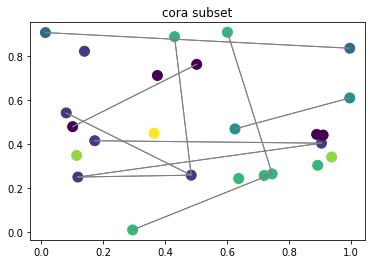

In [8]:
plt.title('cora subset')
utils.plot_graph(cora.adj[:25,:25], points[:25,:], colors=cora.labels[:25])

### Explore

In [9]:
features = cora.nodes
graph = sage.Graph(cora.edges, features)
print(f"num_nodes: {graph.num_nodes}")
print(f"num_feats: {graph.dim_feats}")

num_nodes: 2708
num_feats: 1432


In [10]:
dim_embeds = 6
model = sage.GraphSage(graph.dim_feats, dim_embeds)
model

GraphSage(
  (layers): Sequential(
    (0): SageLayer(
      (weights): Linear(in_features=2864, out_features=6, bias=False)
      (aggregator): MaxPoolAggregator(
        (weights): Linear(in_features=1432, out_features=1432, bias=True)
      )
    )
    (1): SageLayer(
      (weights): Linear(in_features=12, out_features=6, bias=False)
      (aggregator): MaxPoolAggregator(
        (weights): Linear(in_features=6, out_features=6, bias=True)
      )
    )
  )
)

In [11]:
embeds = model(graph)
print(f"embeds: {embeds.shape}")
print(embeds)

embeds: torch.Size([2708, 6])
tensor([[ 0.1045, -0.7335,  0.4910, -0.3046,  0.0253,  0.3414],
        [-0.4175, -0.0045, -0.5138,  0.6298, -0.3934, -0.1012],
        [ 0.1061, -0.8386,  0.3012,  0.1730, -0.1486,  0.3779],
        ...,
        [ 0.3231,  0.0713,  0.3143, -0.2756,  0.7574, -0.3769],
        [ 0.3329, -0.8719,  0.0053, -0.1364,  0.0232,  0.3314],
        [ 0.5746,  0.1274,  0.2400,  0.6879,  0.2772, -0.2141]],
       grad_fn=<DivBackward0>)


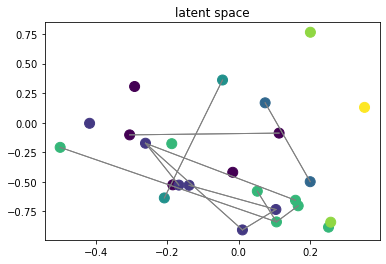

In [12]:
with torch.no_grad():
    plt.title('latent space')
    utils.plot_graph(cora.adj[:25,:25], embeds[:25,:], colors=cora.labels[:25])

### Training

In [13]:
learning_rate = 0.01
epochs = 200 # ~40m
# epochs = 100
# epochs = 64
# epochs = 32

In [14]:
graph = sage.Graph(cora.edges, cora.nodes)
model = sage.GraphSage(graph.dim_feats, cora.num_classes)

In [15]:
xentropy = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [16]:
for i in range(epochs):
    print(f"Epoch {i+1:<3} ------")
    sage.train(model, graph, cora.labels, xentropy, optimizer)
    sage.evaluate(model, graph, cora.labels)
    print()
print("done")

Epoch 1   ------
loss: 1.962503
accuracy: 30.2%

Epoch 2   ------
loss: 1.789001
accuracy: 30.2%

Epoch 3   ------
loss: 1.783195
accuracy: 30.2%

Epoch 4   ------
loss: 1.772110
accuracy: 30.2%

Epoch 5   ------
loss: 1.758687
accuracy: 30.2%

Epoch 6   ------
loss: 1.742851
accuracy: 30.2%

Epoch 7   ------
loss: 1.722875
accuracy: 30.8%

Epoch 8   ------
loss: 1.696896
accuracy: 35.7%

Epoch 9   ------
loss: 1.663134
accuracy: 42.4%

Epoch 10  ------
loss: 1.619442
accuracy: 48.2%

Epoch 11  ------
loss: 1.569342
accuracy: 55.9%

Epoch 12  ------
loss: 1.521284
accuracy: 67.5%

Epoch 13  ------
loss: 1.483133
accuracy: 74.3%

Epoch 14  ------
loss: 1.457151
accuracy: 79.8%

Epoch 15  ------
loss: 1.445134
accuracy: 80.2%

Epoch 16  ------
loss: 1.446751
accuracy: 80.7%

Epoch 17  ------
loss: 1.443684
accuracy: 81.0%

Epoch 18  ------
loss: 1.428558
accuracy: 82.3%

Epoch 19  ------
loss: 1.407724
accuracy: 83.0%

Epoch 20  ------
loss: 1.385858
accuracy: 82.7%

Epoch 21  ------
los

### Visualize

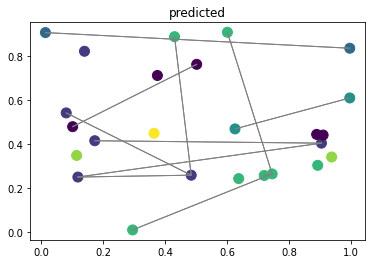

In [17]:
embeds = model(graph)
softmax = nn.Softmax(dim=1)
y_pred = softmax(embeds).argmax(dim=1)

plt.title('predicted')
utils.plot_graph(cora.adj[:25,:25], points[:25,:], colors=y_pred[:25])